In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import sympy
import matplotlib as mpl

In [2]:
mpl.rc("text", usetex=False)

# Punto A #

In [3]:
p=pd.read_csv("DataSet_Resolution_50",header=None)

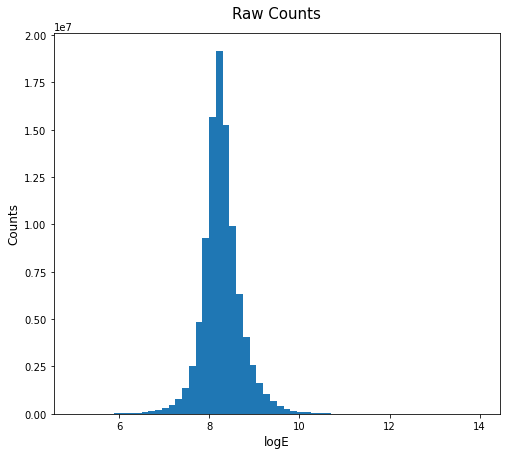

In [4]:
fig1,ax1=plt.subplots(figsize=(8,7))
(n1, bins1, patches1)=ax1.hist(p[0],bins=60,range=(5, 14))
ax1.set_xlabel("logE",fontsize=12)
ax1.set_ylabel("Counts",fontsize=12)
#ax.legend("Mean"+str(p.mean()))
ax1.set_title("Raw Counts",fontsize=15,pad=15)
plt.savefig("Raw_Counts_1.png")

In [5]:
cost1=2*np.pi*3.15 * 10**7

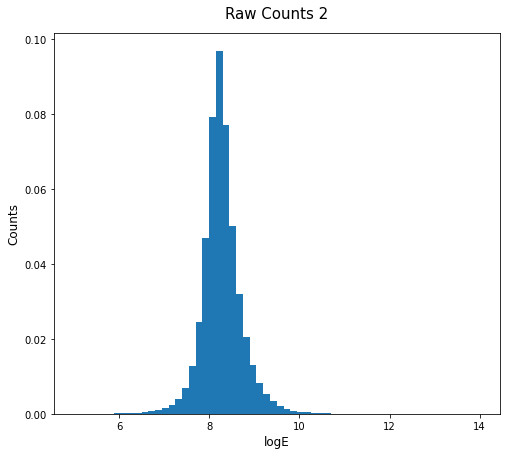

In [6]:
fig2,ax2=plt.subplots(figsize=(8,7))
(n2, bins2, patches2)=ax2.hist(p[0],bins=60,range=(5, 14),weights=(np.zeros_like(p)+1)/cost1)
ax2.set_xlabel("logE",fontsize=12)
ax2.set_ylabel("Counts",fontsize=12)
#ax.legend("Mean"+str(p.mean()))
ax2.set_title("Raw Counts 2",fontsize=15,pad=15)
plt.savefig("Raw_Counts_2.png")

In [7]:
data1=[n2[i-1]/(10**bins1[i]-10**bins1[i-1]) for i in range(1,len(bins1))]

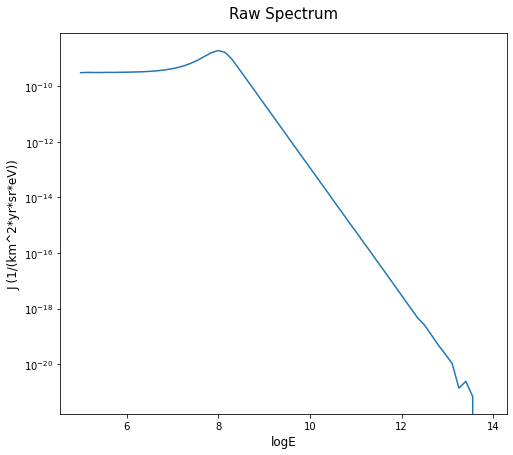

In [8]:
fig3,ax3=plt.subplots(figsize=(8,7))
ax3.plot(bins1[:-1],data1)
#ax.plot(energy[:-1],n5)
#ax.set_xscale('log')
ax3.set_yscale("log")
ax3.set_ylabel("J (1/(km^2*yr*sr*eV))",fontsize=12)
ax3.set_xlabel("logE",fontsize=12)
ax3.set_title("Raw Spectrum",fontsize=15,pad=15)
plt.savefig("Raw_Spectrum_plot.png")

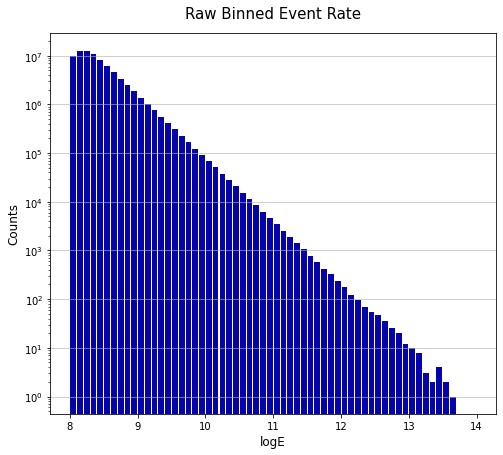

In [9]:
fig4,ax4=plt.subplots(figsize=(8,7))
(n4, bins4, patches4)=ax4.hist(p[0],bins=60,range=(8, 14), rwidth=0.85,color='#0504aa')
ax4.set_xlabel("logE",fontsize=12)
ax4.set_ylabel("Counts",fontsize=12)
ax4.set_yscale("log")
ax4.grid(axis='y', alpha=0.75)
#ax4.set_ylim(0,10**(-9))
#ax.legend("Mean"+str(p.mean()))
ax4.set_title("Raw Binned Event Rate",fontsize=15,pad=15)
plt.savefig("Raw Binned Event Rate.png")

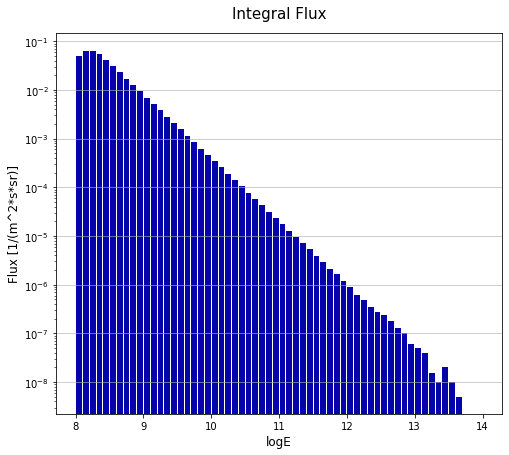

In [10]:
fig5,ax5=plt.subplots(figsize=(8,7))
(n5, bins5, patches5)=ax5.hist(p[0],bins=60,range=(8, 14),weights=(np.zeros_like(p)+1)/cost1, rwidth=0.85,color='#0504aa')
ax5.set_xlabel("logE",fontsize=12)
ax5.set_ylabel("Flux [1/(m^2*s*sr)]",fontsize=12)
ax5.set_yscale("log")
ax5.grid(axis='y', alpha=0.75)
#ax.legend("Mean"+str(p.mean()))
ax5.set_title("Integral Flux",fontsize=15,pad=15)
plt.savefig("Integral Flux.png")

In [11]:
data2=[n5[i-1]/(10**bins5[i]-10**bins5[i-1]) for i in range(1,len(bins5))]

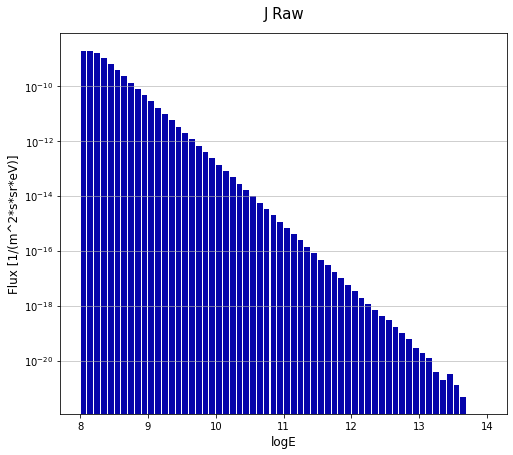

In [12]:
fig6,ax6=plt.subplots(figsize=(8,7))
(n6, bins6, patches6)=ax6.hist(bins5[:-1],bins=60,range=(8, 14),weights=data2, rwidth=0.85,color='#0504aa')
ax6.set_xlabel("logE",fontsize=12)
ax6.set_ylabel("Flux [1/(m^2*s*sr*eV)]",fontsize=12)
ax6.set_yscale("log")
ax6.grid(axis='y', alpha=0.75)
#ax.legend("Mean"+str(p.mean()))
ax6.set_title("J Raw",fontsize=15,pad=15)
plt.savefig("J Raw.png")

# Punto C#

In [13]:
J0=6.57523*10**(-9)
gamma=-2.29989
exposure=np.pi*10**7*2*np.pi

## True Binned Event Rate ##

In [14]:
def counts_fit(x):
    return J0*pow(10,gamma*(x-8))*exposure

In [15]:
real_counts=[counts_fit((bins4[i]+bins4[i-1])/2)*(10**bins4[i]-10**bins4[i-1]) for i in range(1,len(bins4))]

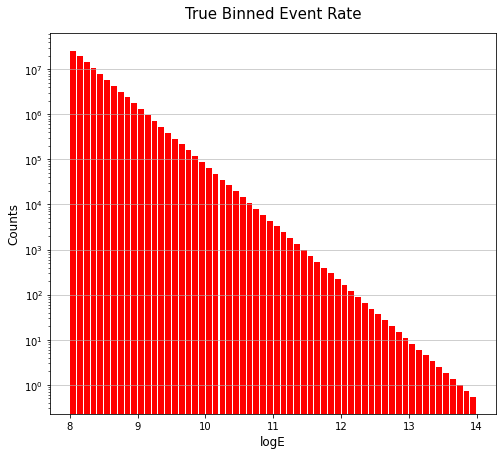

In [16]:
fig7,ax7=plt.subplots(figsize=(8,7))
(n7, bins7, patches7)=ax7.hist(bins5[:-1],bins=60,range=(8, 14),weights=real_counts, rwidth=0.85,color='red')
ax7.set_xlabel("logE",fontsize=12)
ax7.set_ylabel("Counts",fontsize=12)
ax7.set_yscale("log")
ax7.grid(axis='y', alpha=0.75)
#ax.legend("Mean"+str(p.mean()))
ax7.set_title("True Binned Event Rate",fontsize=15,pad=15)
plt.savefig("True Binned Event Rate.png")

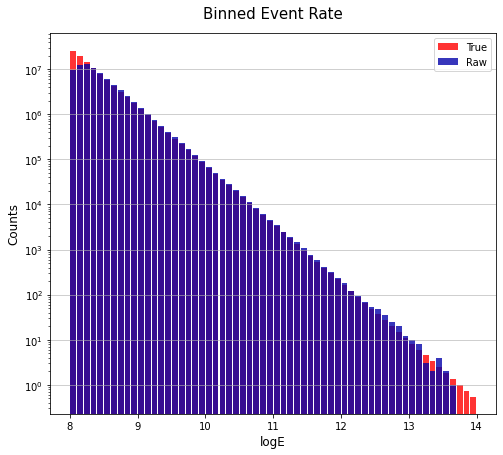

In [17]:
fig8,ax8=plt.subplots(figsize=(8,7))
ax8.hist(bins5[:-1],bins=60,range=(8, 14),weights=real_counts, rwidth=0.85,color='red',alpha=0.8,label="True")
ax8.hist(p[0],bins=60,range=(8, 14), rwidth=0.85,color='#0504aa',alpha=0.8,label="Raw")
ax8.set_xlabel("logE",fontsize=12)
ax8.set_ylabel("Counts",fontsize=12)
ax8.set_yscale("log")
ax8.grid(axis='y', alpha=0.75)
ax8.legend()
ax8.set_title("Binned Event Rate",fontsize=15,pad=15)
plt.savefig("Binned Event Rate.png")

## True Spectrum ##

In [20]:
def J_fit(x):
    return J0*pow(10,gamma*(x-8))

In [21]:
real_J=[J_fit((bins4[i]+bins4[i-1])/2) for i in range(1,len(bins4))]

In [22]:
energy=[10**((bins4[i]+bins4[i-1])/2) for i in range(1,len(bins4))]

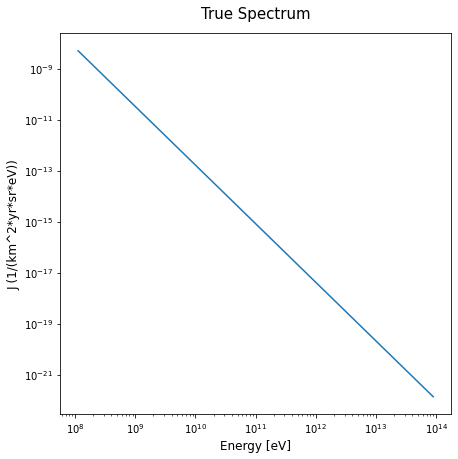

In [23]:
fig7,ax7=plt.subplots(figsize=(7,7))
ax7.plot(energy,real_J)
ax7.set_xscale('log')
ax7.set_yscale("log")
ax7.set_ylabel("J (1/(km^2*yr*sr*eV))",fontsize=12)
ax7.set_xlabel("Energy [eV]",fontsize=12)
ax7.set_title("True Spectrum",fontsize=15,pad=15)
plt.savefig("True Spectrum.png")

# Punto D #

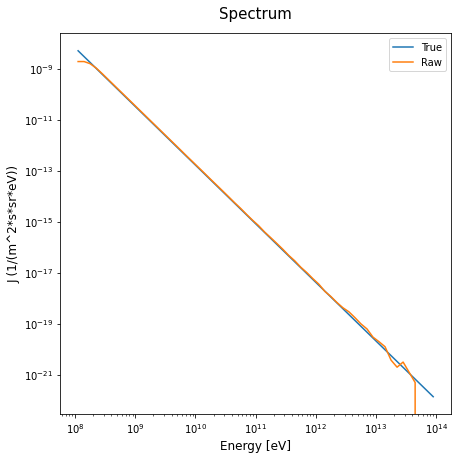

In [24]:
fig8,ax8=plt.subplots(figsize=(7,7))
ax8.plot(energy,real_J,label="True")
ax8.plot(energy,data2,label="Raw")
ax8.set_xscale('log')
ax8.set_yscale("log")
ax8.set_ylabel("J (1/(m^2*s*sr*eV))",fontsize=12)
ax8.set_xlabel("Energy [eV]",fontsize=12)
ax8.set_title("Spectrum",fontsize=15,pad=15)
ax8.legend()
plt.savefig("Spectrum.png")

In [25]:
true_raw_fraction=[real_J[i]/data2[i] for i in range(0,len(n5))]

/home/andry/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in double_scalars
  """Entry point for launching an IPython kernel.


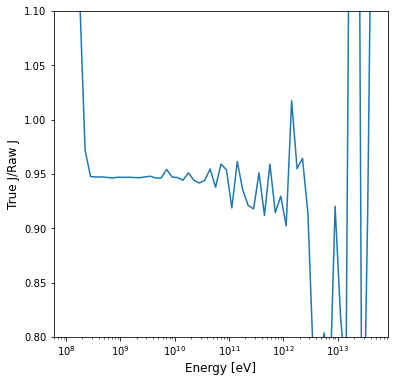

In [32]:
fig9,ax9=plt.subplots(figsize=(6,6))
ax9.plot(energy,true_raw_fraction)
ax9.set_xscale('log')
#ax9.set_yscale('log')
ax9.set_ylim(0.8,1.1)
ax9.set_xlabel("Energy [eV]",fontsize=12)
ax9.set_ylabel("True J/Raw J",fontsize=12)
plt.savefig("True J_Raw J.png")

# Punto E #

In [27]:
x = sympy.symbols('x')

In [28]:
y=J0*pow(10,gamma*(x-8))*2*np.pi

In [29]:
c=sympy.integrate(y,(x,9,9.1))

In [30]:
c.evalf()*10**(9.05)

0.0180413613773858

In [31]:
J0*pow(10,gamma*(9.05-8))*2*np.pi*(10**9.1-10**9)

0.041151056811310156